# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [91]:
# Import warnings
import warnings

In [93]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [97]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [113]:
import os
import pandas as pd
import glob
import re

# Get list of all files matching the pattern
file_pattern = "2023-*.parquet"
file_list = glob.glob(file_pattern)

# Function to extract month number for sorting
def extract_month_number(filename):
    match = re.search(r'2023-(\d+)\.parquet', filename)
    return int(match.group(1)) if match else float('inf')

# Sort files numerically
sorted_files = sorted(file_list, key=extract_month_number)

# Check if files exist before processing
if not sorted_files:
    print("No matching files found! Exiting...")
    exit()

print("Processing files in this order:", sorted_files)

# Initialize an empty dataframe for final sampled data
sampled_data = pd.DataFrame()

# Define sampling fraction
sampling_fraction = 0.05  

# Iterate through each file (month)
for file in sorted_files:
    try:
        print(f"Processing {file}...")

        # Load the parquet file
        df = pd.read_parquet(file)

        # Check for necessary column
        if 'tpep_pickup_datetime' not in df.columns:
            print(f"Skipping {file} - 'tpep_pickup_datetime' column missing.")
            continue  

        # Convert datetime column safely
        try:
            df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
        except Exception as e:
            print(f"Error converting datetime in {file}: {e}")
            continue  

        df['date'] = df['tpep_pickup_datetime'].dt.date
        df['hour'] = df['tpep_pickup_datetime'].dt.hour

        # Iterate through each unique date
        for date in df['date'].unique():
            sampled_day = pd.DataFrame()

            for hour in range(24):
                hourly_data = df[(df['date'] == date) & (df['hour'] == hour)]

                if not hourly_data.empty:
                    sampled_hour = hourly_data.sample(frac=sampling_fraction, random_state=42)
                    sampled_day = pd.concat([sampled_day, sampled_hour], ignore_index=True)

            # Append sampled day data
            sampled_data = pd.concat([sampled_data, sampled_day], ignore_index=True)

    except Exception as e:
        print(f"Error processing file {file}: {e}")
        
# Store the df in csv/parquet
print("Sampling complete!")

Processing files in this order: ['2023-1.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet']
Processing 2023-1.parquet...
Processing 2023-2.parquet...
Processing 2023-3.parquet...
Processing 2023-4.parquet...
Processing 2023-5.parquet...
Processing 2023-6.parquet...
Processing 2023-7.parquet...
Processing 2023-8.parquet...
Processing 2023-9.parquet...
Processing 2023-10.parquet...
Processing 2023-11.parquet...
Processing 2023-12.parquet...


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [79]:
# Store the df in csv/parquet
sampled_data.to_parquet("sampled_data_reduced.parquet", index=False)

print("Sampling complete! Data saved as 'sampled_data_reduced.parquet'.")
print("Final sampled record count:", len(sampled_data))

NameError: name 'sampled_data' is not defined

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [81]:
# Load the new data file
import pandas as pd
df = pd.read_parquet('sampled_data_reduced.parquet')

In [5]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [59]:
# Fix the index and drop any columns that are not needed

Already a proper range index — no action needed.
All columns seem to be important. So dropping none at this point.

SyntaxError: invalid character '—' (U+2014) (1256270272.py, line 3)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [99]:
# Combine the two airport fee columns

# Load the new data file
import pandas as pd
df = pd.read_parquet('sampled_data_reduced.parquet')

diff_rows = df[df['airport_fee'] != df['Airport_fee']]
print(diff_rows[['airport_fee', 'Airport_fee']])
df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])
df = df.drop(columns=['Airport_fee'])  # Drop duplicate
df.to_parquet("sampled_data_reduced.parquet", index=False)

         airport_fee  Airport_fee
0               1.25          NaN
1               0.00          NaN
2               0.00          NaN
3               0.00          NaN
4                NaN          NaN
...              ...          ...
1896395          NaN          0.0
1896396          NaN          0.0
1896397          NaN          0.0
1896398          NaN          NaN
1896399          NaN          0.0

[1896400 rows x 2 columns]


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [101]:
# Load the new data file
import pandas as pd
df = pd.read_parquet('sampled_data_reduced.parquet')

# check where values of fare amount are negative
print(df["RatecodeID"])
negative_fare_rows = df[df['fare_amount'] < 0]

# Display the number of such rows
print(f"Number of trips with negative fare amounts: {len(negative_fare_rows)}")

0          1.0
1          1.0
2          1.0
3          1.0
4          NaN
          ... 
1896395    1.0
1896396    1.0
1896397    1.0
1896398    NaN
1896399    1.0
Name: RatecodeID, Length: 1896400, dtype: float64
Number of trips with negative fare amounts: 0


In [95]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

No negative fare amounts so far

In [103]:
# Find which columns have negative values

import pandas as pd

# Load the new data file
import pandas as pd
df = pd.read_parquet('sampled_data_reduced.parquet')

# Identify numeric columns only
numeric_cols = df.select_dtypes(include='number')

# Find which columns have negative values
negatives_exist = (numeric_cols < 0).any()
columns_with_negatives = negatives_exist[negatives_exist].index.tolist()

# Count negative values in those columns
negative_counts = numeric_cols[columns_with_negatives].lt(0).sum()

# Optionally print or return
print("Columns with negative values:")
print(negative_counts)

Columns with negative values:
extra                     3
mta_tax                  73
improvement_surcharge    78
total_amount             78
congestion_surcharge     56
airport_fee              15
dtype: int64


In [105]:
# fix these negative values

# Load the new data file
import pandas as pd
df = pd.read_parquet('sampled_data_reduced.parquet')

# Drop rows where any numeric column has a negative value
df = df[~(df.select_dtypes(include='number') < 0).any(axis=1)]
df.to_parquet("sampled_data_reduced.parquet", index=False)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [111]:
# Find the proportion of missing values in each column

# Load the new data file
import pandas as pd
df = pd.read_parquet('sampled_data_reduced.parquet')

missing_proportion = df.isnull().mean() * 100

missing_proportion_df = missing_proportion.to_frame(name="Missing Percentage").T

# Display the result
print(missing_proportion_df)
df.to_parquet("sampled_data_reduced.parquet", index=False)

                    VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  \
Missing Percentage       0.0                   0.0                    0.0   

                    passenger_count  trip_distance  RatecodeID  \
Missing Percentage         3.421045            0.0    3.421045   

                    store_and_fwd_flag  PULocationID  DOLocationID  \
Missing Percentage            3.421045           0.0           0.0   

                    payment_type  ...  extra  mta_tax  tip_amount  \
Missing Percentage           0.0  ...    0.0      0.0         0.0   

                    tolls_amount  improvement_surcharge  total_amount  \
Missing Percentage           0.0                    0.0           0.0   

                    congestion_surcharge  airport_fee  date  hour  
Missing Percentage              3.421045     3.421045   0.0   0.0  

[1 rows x 21 columns]


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [115]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
# Load the new data file
import pandas as pd
df = pd.read_parquet('sampled_data_reduced.parquet')

rows_with_nulls = df[df.isnull().any(axis=1)]
print(rows_with_nulls)

# Impute NaN values in 'passenger_count' 
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())
df.to_parquet("sampled_data_reduced.parquet", index=False)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...           ...                  ...                   ...              ...   
1896296         2  2023-12-31 23:09:34   2023-12-31 23:36:00              NaN   
1896300         2  2023-12-31 23:05:26   2023-12-31 23:18:01              NaN   
1896311         2  2023-12-31 23:38:22   2024-01-01 00:02:48              NaN   
1896313         2  2023-12-31 23:35:59   2023-12-31 23:39:21              NaN   
1896319         1  2023-12-31 23:12:30   2023-12-31 23:21:12              NaN   

         trip_distance  Rat

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [121]:
# Fix missing values in 'RatecodeID'
# Load the new data file
import pandas as pd
df = pd.read_parquet('sampled_data_reduced.parquet')
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])
df.to_parquet("sampled_data_reduced.parquet", index=False)
# Verify if missing values are imputed
print(f"Remaining missing values in 'RatecodeID': {df['RatecodeID'].isnull().sum()}")

Remaining missing values in 'RatecodeID': 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [123]:
# handle null values in congestion_surcharge
# Load the new data file
import pandas as pd
df = pd.read_parquet('sampled_data_reduced.parquet')
# Impute NaN values in 'congestion_surcharge' with the median value
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].median())
df.to_parquet("sampled_data_reduced.parquet", index=False)
# Verify if missing values are imputed
print(f"Remaining missing values in 'congestion_surcharge': {df['congestion_surcharge'].isnull().sum()}")

Remaining missing values in 'congestion_surcharge': 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [125]:
# Handle any remaining missing values
# Load the new data file
import pandas as pd
df = pd.read_parquet('sampled_data_reduced.parquet')
# Fill remaining missing values with appropriate strategies
df.fillna({
    'passenger_count': df['passenger_count'].median(),
    'RatecodeID': df['RatecodeID'].mode()[0],
    'store_and_fwd_flag': df['store_and_fwd_flag'].mode()[0],
    'fare_amount': df['fare_amount'].median(),
    'extra': df['extra'].median(),
    'mta_tax': df['mta_tax'].median(),
    'tip_amount': df['tip_amount'].median(),
    'tolls_amount': df['tolls_amount'].median(),
    'improvement_surcharge': df['improvement_surcharge'].median(),
    'total_amount': df['total_amount'].median(),
    'congestion_surcharge': df['congestion_surcharge'].median(),
    'airport_fee': df['airport_fee'].median(),
    'hour': df['hour'].mode()[0]
}, inplace=True)
df.to_parquet("sampled_data_reduced.parquet", index=False)
# Verify if all missing values are handled
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
date                     0
hour                     0
dtype: int64


In [127]:
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
date                     0
hour                     0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [129]:
# Describe the data and check if there are any potential outliers present

import pandas as pd

# Load the new data file
import pandas as pd
df = pd.read_parquet('sampled_data_reduced.parquet')

# Identify potential outliers using Interquartile Range (IQR)
def detect_outliers_iqr(df, columns):
    outlier_info = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_info[column] = {
            "Q1": Q1, "Q3": Q3, "IQR": IQR,
            "Lower Bound": lower_bound, "Upper Bound": upper_bound,
            "Outlier Count": outliers.shape[0]
        }
    return outlier_info

# Define numeric columns for outlier detection
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Run outlier detection
outliers_detected = detect_outliers_iqr(df, numeric_columns)

# Print outlier summary
for col, info in outliers_detected.items():
    print(f"\nColumn: {col}")
    print(info)

# Check for potential out of place values in various columns

import pandas as pd
import numpy as np

# Load dataset
# df = pd.read_csv("your_dataset.csv")  # Uncomment and update with your dataset file

# Function to check for out-of-place values
def check_out_of_place_values(df):
    potential_issues = {}

    # Checking for negative or extremely high values in numeric columns
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        min_value = df[column].min()
        max_value = df[column].max()
        if min_value < 0:
            potential_issues[column] = f"Contains negative values (Min: {min_value})"
        elif max_value > df[column].mean() + 3 * df[column].std():
            potential_issues[column] = f"Has unusually high values (Max: {max_value})"

    # Checking for unexpected values in categorical columns
    categorical_checks = {
        "store_and_fwd_flag": ["Y", "N"],  # Expected values
        "payment_type": [1, 2, 3, 4],  # Valid payment types
        "RatecodeID": [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],  # Expected Ratecode IDs
    }
    
    for column, expected_values in categorical_checks.items():
        if column in df.columns:
            unexpected_values = df[~df[column].isin(expected_values)][column].unique()
            if len(unexpected_values) > 0:
                potential_issues[column] = f"Contains unexpected values: {unexpected_values}"

    return potential_issues

# Run the check
out_of_place_values = check_out_of_place_values(df)

# Print results
if out_of_place_values:
    print("Potential out-of-place values detected:")
    for col, issue in out_of_place_values.items():
        print(f"- {col}: {issue}")
else:
    print("No significant out-of-place values detected.")


Column: VendorID
{'Q1': 1.0, 'Q3': 2.0, 'IQR': 1.0, 'Lower Bound': -0.5, 'Upper Bound': 3.5, 'Outlier Count': 444}

Column: passenger_count
{'Q1': 1.0, 'Q3': 1.0, 'IQR': 0.0, 'Lower Bound': 1.0, 'Upper Bound': 1.0, 'Outlier Count': 454279}

Column: trip_distance
{'Q1': 1.05, 'Q3': 3.4, 'IQR': 2.3499999999999996, 'Lower Bound': -2.4749999999999996, 'Upper Bound': 6.924999999999999, 'Outlier Count': 249288}

Column: RatecodeID
{'Q1': 1.0, 'Q3': 1.0, 'IQR': 0.0, 'Lower Bound': 1.0, 'Upper Bound': 1.0, 'Outlier Count': 102238}

Column: PULocationID
{'Q1': 132.0, 'Q3': 234.0, 'IQR': 102.0, 'Lower Bound': -21.0, 'Upper Bound': 387.0, 'Outlier Count': 0}

Column: DOLocationID
{'Q1': 114.0, 'Q3': 234.0, 'IQR': 120.0, 'Lower Bound': -66.0, 'Upper Bound': 414.0, 'Outlier Count': 0}

Column: payment_type
{'Q1': 1.0, 'Q3': 1.0, 'IQR': 0.0, 'Lower Bound': 1.0, 'Upper Bound': 1.0, 'Outlier Count': 403949}

Column: fare_amount
{'Q1': 9.3, 'Q3': 21.9, 'IQR': 12.599999999999998, 'Lower Bound': -9.5999

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [131]:
# remove passenger_count > 6

# Load the new data file
import pandas as pd
df = pd.read_parquet('sampled_data_reduced.parquet')
df = df[df["passenger_count"] <= 6]
df.to_parquet("sampled_data_reduced.parquet", index=False)
print(df.describe())
print(len(df))

           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896300e+06                     1896300                     1896300   
mean   1.733012e+00  2023-07-02 19:58:26.767841  2023-07-02 20:15:52.760963   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-02 16:08:37         2023-04-02 16:27:03   
50%    2.000000e+00  2023-06-27 15:42:39.500000         2023-06-27 15:59:57   
75%    2.000000e+00  2023-10-06 19:36:06.500000  2023-10-06 19:52:16.500000   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476477e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896300e+06   1.896300e+06  1.896300e+06  1.896300e+06   
mean      1.356505e+00   3.858240e+00  1.612948e+00  1.652817e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.

In [133]:
# Continue with outlier handling

# Load your dataset
import pandas as pd
df = pd.read_parquet('sampled_data_reduced.parquet')

# Remove entries where passenger_count > 6 (assuming max valid is 6)
df = df[df["passenger_count"] <= 6]

# Remove entries where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df["trip_distance"] < 0.1) & (df["fare_amount"] > 300))]

# Remove entries where trip_distance and fare_amount are 0 but pickup and dropoff zones are different
df = df[~((df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"]))]

# Remove entries where trip_distance is more than 250 miles (considered extreme outliers)
df = df[df["trip_distance"] <= 250]

# Remove entries where payment_type is 0 (invalid payment type)
df = df[df["payment_type"] != 0]
df.to_parquet("sampled_data_reduced.parquet", index=False)
# Display the cleaned dataset summary
print(df.describe())

           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.831316e+06                     1831316                     1831316   
mean   1.736315e+00  2023-07-01 21:14:09.675267  2023-07-01 21:31:31.662377   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-01 20:10:47  2023-04-01 20:25:05.750000   
50%    2.000000e+00  2023-06-26 08:18:51.500000  2023-06-26 08:34:42.500000   
75%    2.000000e+00  2023-10-05 19:16:08.250000  2023-10-05 19:33:31.250000   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.406307e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.831316e+06   1.831316e+06  1.831316e+06  1.831316e+06   
mean      1.369140e+00   3.444776e+00  1.634053e+00  1.654593e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.

In [135]:
# Do any columns need standardising?
from sklearn.preprocessing import StandardScaler

# Load your dataset
import pandas as pd
df = pd.read_parquet('sampled_data_reduced.parquet')

# Columns to standardize
columns_to_standardize = ["trip_distance", "fare_amount", "tip_amount", "tolls_amount", "total_amount"]

# Apply StandardScaler
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Save the standardized dataset if needed
df.to_parquet("sampled_data_reduced.parquet", index=False)

# Print summary after standardization
print(df.describe())

           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.831316e+06                     1831316                     1831316   
mean   1.736315e+00  2023-07-01 21:14:09.675267  2023-07-01 21:31:31.662377   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-01 20:10:47  2023-04-01 20:25:05.750000   
50%    2.000000e+00  2023-06-26 08:18:51.500000  2023-06-26 08:34:42.500000   
75%    2.000000e+00  2023-10-05 19:16:08.250000  2023-10-05 19:33:31.250000   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.406307e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.831316e+06   1.831316e+06  1.831316e+06  1.831316e+06   
mean      1.369140e+00   3.655230e-16  1.634053e+00  1.654593e+02   
min       0.000000e+00  -7.579443e-01  1.000000e+00  1.000000e+00   
25%       1.

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [137]:
# Load the new data file
import pandas as pd
df = pd.read_parquet('sampled_data_reduced.parquet')
print(len(df))

1831316


In [139]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

In [141]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0       0.945066         1.0                  N           138           256   
1      -0.485111         1.0                  N           161           237   
2      -0.441105         1.0                  N           237           141   
3      -0.639130         1.0                  N           143           142   
4       0.804248         1.0                  N           246            37   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    6.0      0.5   -0.878170     -0.272839   
1             1  ...    1.0      0.5   -0.244178     -0.272839   
2             2  ...    1.0      0.5   -0.878170     -0.272839   
3             2  ...    1.0      0.5   -0.878170     -0.272839   
4             1  ...    3.5      0.5    1.063122     -0.272839   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0      0.112814                   0.0         1.25   
1                    1.0     -0.124391                   2.5         0.00   
2                    1.0     -0.115889                   2.5         0.00   
3                    1.0     -0.161168                   2.5         0.00   
4                    1.0      0.170568                   2.5         0.00   

         date hour  
0  2023-01-01    0  
1  2023-01-01    0  
2  2023-01-01    0  
3  2023-01-01    0  
4  2023-01-01    0  

[5 rows x 21 columns]

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical  
* `tpep_pickup_datetime`: Categorical  
* `tpep_dropoff_datetime`: Categorical  
* `passenger_count`: Numerical  
* `trip_distance`: Numerical  
* `RatecodeID`: Categorical  
* `PULocationID`: Categorical  
* `DOLocationID`: Categorical  
* `payment_type`: Categorical  
* `pickup_hour`: Numerical  
* `trip_duration`: Numerical  

The following monetary parameters belong in the same category, and they are **Numerical**:  

* `fare_amount`: Numerical  
* `extra`: Numerical  
* `mta_tax`: Numerical  
* `tip_amount`: Numerical  
* `tolls_amount`: Numerical  
* `improvement_surcharge`: Numerical  
* `total_amount`: Numerical  
* `congestion_surcharge`: Numerical  
* `airrt_fee`: Numerical  


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

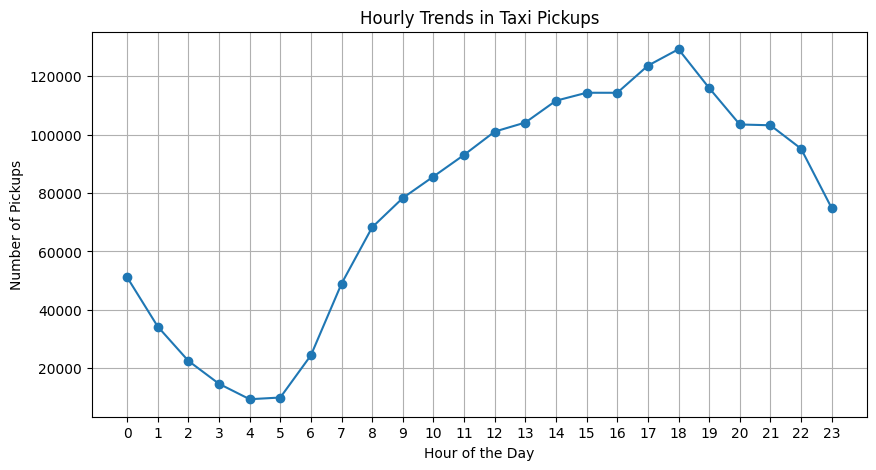

In [145]:
# Find and show the hourly trends in taxi pickups
import pandas as pd
import matplotlib.pyplot as plt

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Ensure 'hour' is treated as numerical
df['hour'] = pd.to_numeric(df['hour'], errors='coerce')

# Group by hour and count the number of pickups
hourly_trends = df.groupby('hour').size()

# Plot the hourly trends
plt.figure(figsize=(10, 5))
plt.plot(hourly_trends.index, hourly_trends.values, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Trends in Taxi Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

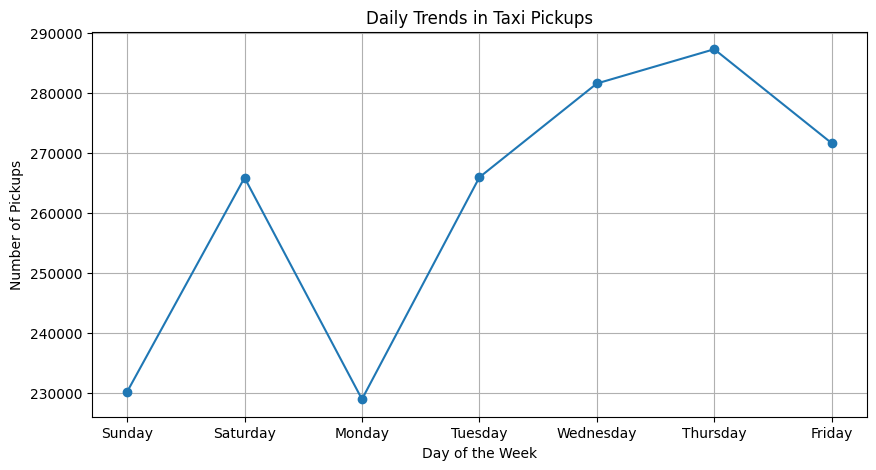

In [147]:
# Find and show the daily trends in taxi pickups (days of the week)

import pandas as pd
import matplotlib.pyplot as plt

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['date'].dt.dayofweek

# Group by day of the week and count the number of pickups
daily_trends = df.groupby('day_of_week').size()

# Define labels for days of the week
days_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Filter labels to match the available days in the dataset
unique_days = df['day_of_week'].unique()
available_days = [days_labels[i] for i in unique_days if i < len(days_labels)]

# Filter data accordingly
daily_trends_filtered = daily_trends.loc[unique_days]

# Plot the daily trends
plt.figure(figsize=(10, 5))
plt.plot(available_days, daily_trends_filtered.values, marker='o', linestyle='-')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.title('Daily Trends in Taxi Pickups')
plt.grid(True)
plt.show()


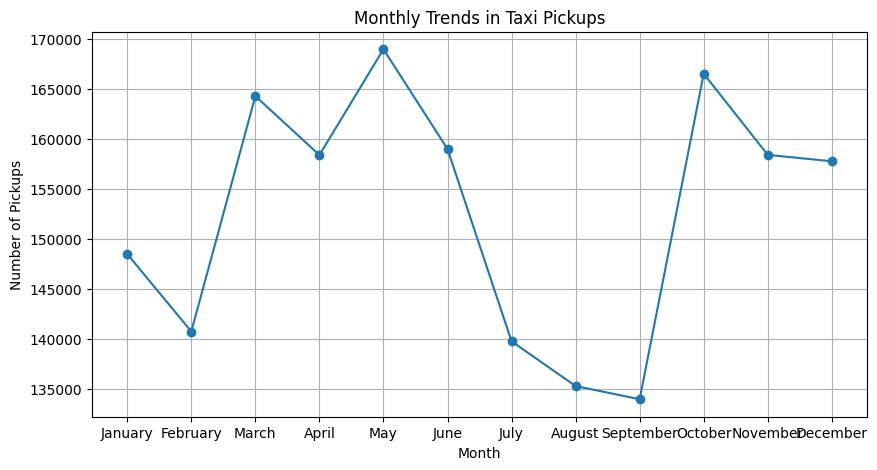

In [149]:
# Show the monthly trends in pickups

import pandas as pd
import matplotlib.pyplot as plt

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract the month from the 'date' column
df['month'] = df['date'].dt.month

# Group by month and count the number of pickups
monthly_trends = df.groupby('month').size()

# Define labels for months
months_labels = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November', 'December']

# Plot the monthly trends
plt.figure(figsize=(10, 5))
plt.plot(months_labels[:len(monthly_trends)], monthly_trends.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.title('Monthly Trends in Taxi Pickups')
plt.grid(True)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [151]:
# Analyse the above parameters

import pandas as pd

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Define financial parameters and trip distance
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Create a dictionary to store counts of zero and negative values
zero_negative_counts = {
    col: {
        'Zero Values': (df[col] == 0).sum(),
        'Negative Values': (df[col] < 0).sum()
    }
    for col in financial_columns
}

# Convert dictionary to DataFrame for better visualization
zero_negative_df = pd.DataFrame.from_dict(zero_negative_counts, orient='index')

# Display the results
print(zero_negative_df)


               Zero Values  Negative Values
fare_amount              0          1313894
tip_amount               0          1171116
total_amount             0          1321630
trip_distance            0          1384796


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [153]:
# Create a df with non zero entries for the selected parameters.
import pandas as pd

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Define the parameters to filter non-zero entries
selected_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Create a DataFrame with non-zero entries for the selected parameters
df_non_zero = df[(df[selected_columns] > 0).all(axis=1)]

# Save the standardized dataset if needed
df_non_zero.to_parquet("sampled_data_reduced.parquet", index=False)

# Display the filtered DataFrame
print(df_non_zero)


         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
7               2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
12              2  2023-01-01 00:13:02   2023-01-01 00:38:02              1.0   
24              2  2023-01-01 00:24:12   2023-01-01 00:48:09              2.0   
25              2  2023-01-01 00:41:09   2023-01-01 01:00:39              3.0   
...           ...                  ...                   ...              ...   
1831299         2  2023-12-31 23:37:35   2023-12-31 23:56:29              1.0   
1831300         2  2023-12-31 23:01:21   2023-12-31 23:33:08              1.0   
1831306         2  2023-12-31 23:48:43   2024-01-01 00:10:39              1.0   
1831311         2  2023-12-31 23:38:35   2024-01-01 00:05:50              5.0   
1831313         2  2023-12-31 23:44:04   2024-01-01 00:03:36              1.0   

         trip_distance  Rat

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

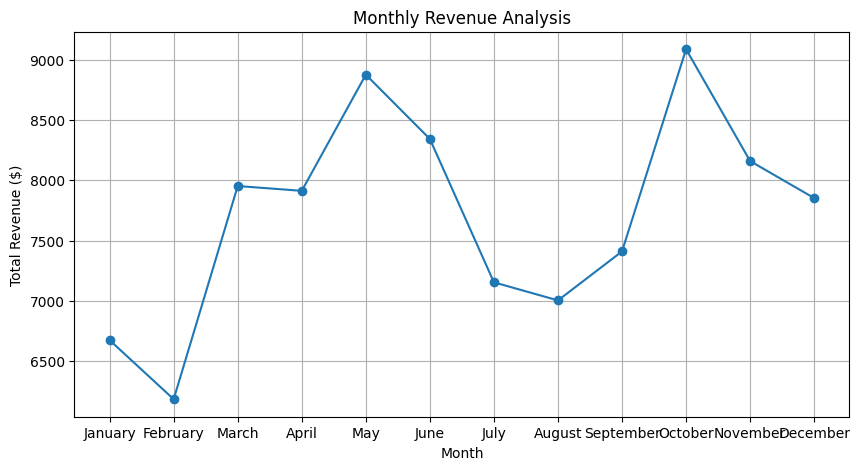

    month  total_amount
0       1   6673.591449
1       2   6183.364845
2       3   7952.733584
3       4   7912.950057
4       5   8876.981763
5       6   8343.214166
6       7   7153.545415
7       8   7003.537297
8       9   7410.134052
9      10   9088.255561
10     11   8160.005711
11     12   7852.735557


In [155]:
# Group data by month and analyse monthly revenue

import pandas as pd
import matplotlib.pyplot as plt


# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract the month from the 'date' column
df['month'] = df['date'].dt.month

# Filter out entries where financial parameters are non-zero
selected_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df_non_zero = df[(df[selected_columns] > 0).all(axis=1)]

# Group data by month and calculate total revenue (sum of total_amount)
monthly_revenue = df_non_zero.groupby('month')['total_amount'].sum()

# Define labels for months
months_labels = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November', 'December']

# Plot the monthly revenue trends
plt.figure(figsize=(10, 5))
plt.plot(months_labels[:len(monthly_revenue)], monthly_revenue.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.title('Monthly Revenue Analysis')
plt.grid(True)
plt.show()

# Display the revenue data
print(monthly_revenue.reset_index())


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [157]:
# Calculate proportion of each quarter

import pandas as pd

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract the month from the 'date' column
df['month'] = df['date'].dt.month

# Filter out entries where financial parameters are non-zero
selected_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df_non_zero = df[(df[selected_columns] > 0).all(axis=1)].copy()

# Define quarters based on months
df_non_zero['quarter'] = df_non_zero['month'].apply(lambda x: (x - 1) // 3 + 1)

# Group data by quarter and calculate total revenue
quarterly_revenue = df_non_zero.groupby('quarter')['total_amount'].sum()

# Calculate proportion of each quarter
quarterly_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100

# Display the results
print(quarterly_proportion.reset_index())

   quarter  total_amount
0        1     22.469986
1        2     27.138388
2        3     23.287952
3        4     27.103674


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

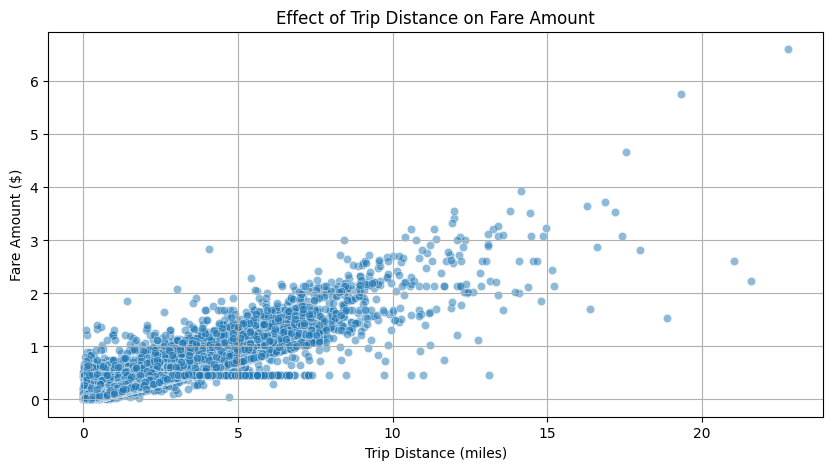

In [159]:
# Show how trip fare is affected by distance

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter out entries where financial parameters and trip distance are non-zero
selected_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df_non_zero = df[(df[selected_columns] > 0).all(axis=1)].copy()

# Scatter plot to visualize the relationship between trip distance and fare amount
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_non_zero, x='trip_distance', y='fare_amount', alpha=0.5)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Effect of Trip Distance on Fare Amount')
plt.grid(True)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

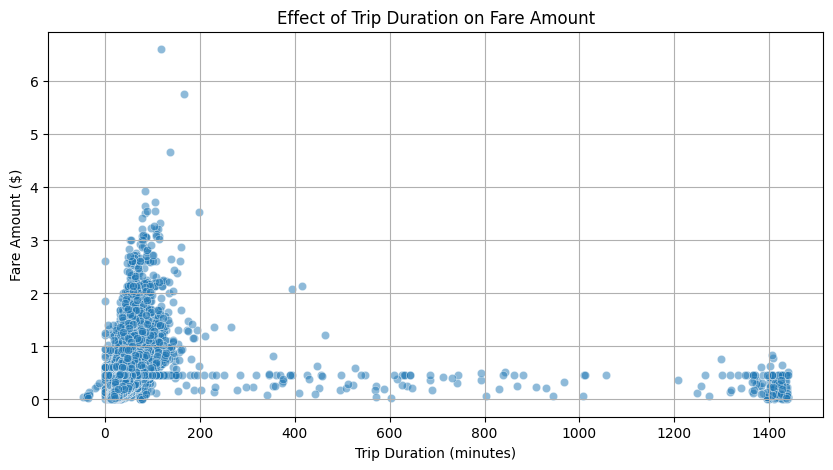

In [161]:
# Show relationship between fare and trip duration

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert pickup and dropoff times to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

# Filter out entries where financial parameters and trip distance are non-zero
selected_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df_non_zero = df[(df[selected_columns] > 0).all(axis=1)].copy()

# Calculate trip duration in minutes
df_non_zero['trip_duration'] = (df_non_zero['tpep_dropoff_datetime'] - df_non_zero['tpep_pickup_datetime']).dt.total_seconds() / 60

# Scatter plot to visualize the relationship between trip duration and fare amount
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_non_zero, x='trip_duration', y='fare_amount', alpha=0.5)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.title('Effect of Trip Duration on Fare Amount')
plt.grid(True)
plt.show()

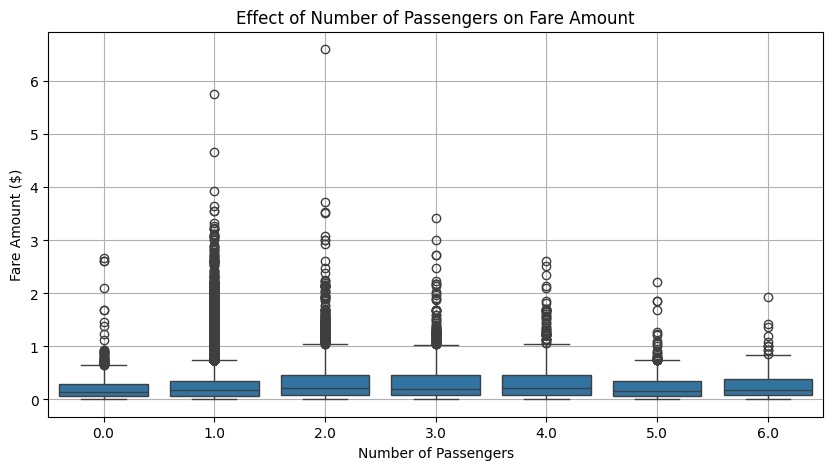

In [163]:
# Show relationship between fare and number of passengers

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter out entries where financial parameters and trip distance are non-zero
selected_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df_non_zero = df[(df[selected_columns] > 0).all(axis=1)].copy()

# Scatter plot to visualize the relationship between number of passengers and fare amount
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_non_zero, x='passenger_count', y='fare_amount')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.title('Effect of Number of Passengers on Fare Amount')
plt.grid(True)
plt.show()

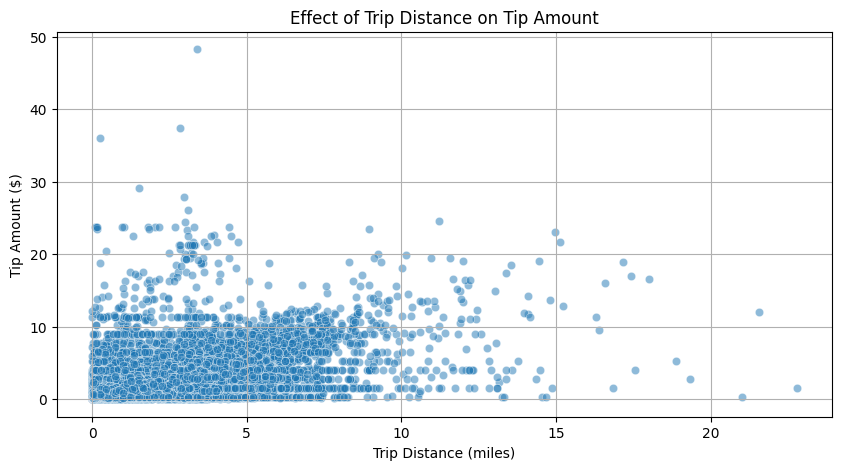

In [165]:
# Show relationship between tip and trip distance

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter out entries where financial parameters and trip distance are non-zero
selected_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df_non_zero = df[(df[selected_columns] > 0).all(axis=1)].copy()

# Scatter plot to visualize the relationship between trip distance and tip amount
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_non_zero, x='trip_distance', y='tip_amount', alpha=0.5)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.title('Effect of Trip Distance on Tip Amount')
plt.grid(True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

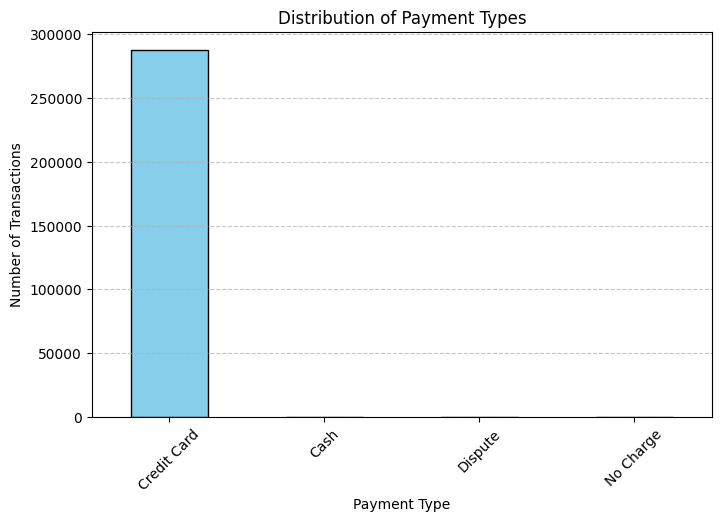

In [167]:
# Analyse the distribution of different payment types (payment_type).

import pandas as pd
import matplotlib.pyplot as plt

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Filter out entries where financial parameters and trip distance are non-zero
selected_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df_non_zero = df[(df[selected_columns] > 0).all(axis=1)].copy()

# Count occurrences of each payment type
payment_type_counts = df_non_zero['payment_type'].value_counts()

# Define labels for payment types (based on common taxi datasets)
payment_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

# Map payment type codes to labels
payment_type_counts.index = payment_type_counts.index.map(lambda x: payment_labels.get(x, 'Other'))

# Plot the distribution of payment types
plt.figure(figsize=(8, 5))
payment_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Payment Types')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [59]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [169]:
import geopandas as gpd

# Read the shapefile using GeoPandas
zones = gpd.read_file('taxi_zones.shp')

# Display the first few rows of the GeoDataFrame
print(zones.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

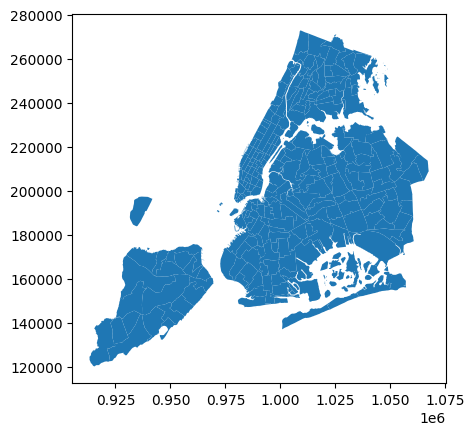

In [171]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [173]:
# Merge zones and trip records using locationID and PULocationID

import pandas as pd
import geopandas as gpd

# Load the PARQUET file
trip_df = pd.read_parquet('sampled_data_reduced.parquet') 

# Load the taxi zones shapefile
shapefile_path = "taxi_zones.shp"  # Update with the correct path
zones_gdf = gpd.read_file(shapefile_path)

# Merge zones and trip records using 'LocationID' from zones and 'PULocationID' from trip data
merged_df = trip_df.merge(zones_gdf, left_on="PULocationID", right_on="LocationID", how="left")

# Display the merged dataset
print(merged_df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
1         2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
2         2  2023-01-01 00:13:02   2023-01-01 00:38:02              1.0   
3         2  2023-01-01 00:24:12   2023-01-01 00:48:09              2.0   
4         2  2023-01-01 00:41:09   2023-01-01 01:00:39              3.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0       0.804248         1.0                  N           246            37   
1       0.923063         1.0                  N           132            95   
2       0.203574         1.0                  N           142           148   
3       0.797648         1.0                  N           144             7   
4       0.320189         1.0                  N           107           238   

   payment_type  ...  airport_fee        date  hour  OBJECTID  Shape_Leng 

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

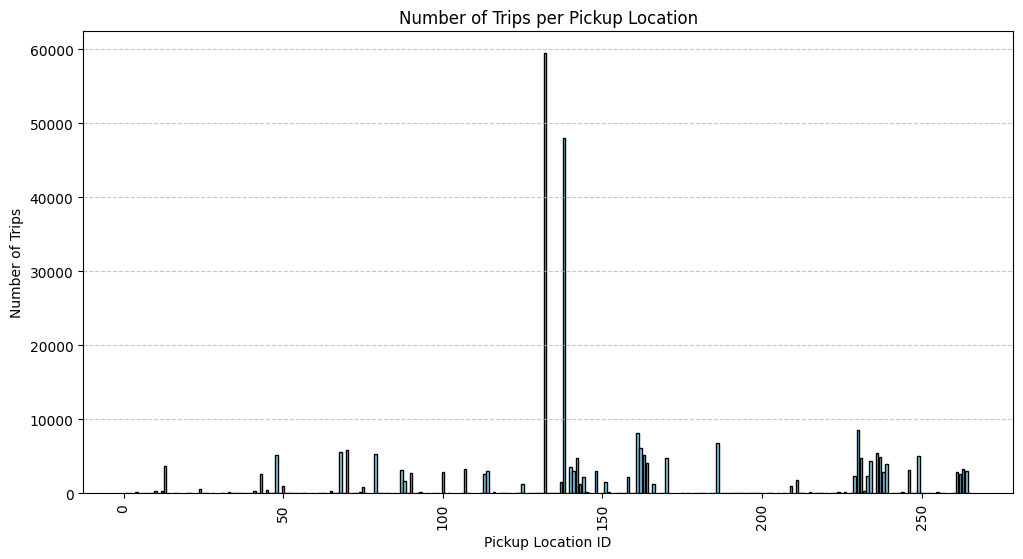

     PULocationID  trip_count
0               1          11
1               2           2
2               4         234
3               6           1
4               7          61
..            ...         ...
196           261        2881
197           262        2566
198           263        3274
199           264        3079
200           265          72

[201 rows x 2 columns]


In [175]:
# Group data by location and calculate the number of trips

import pandas as pd
import matplotlib.pyplot as plt

# Load the PARQUET file
trip_df = pd.read_parquet('sampled_data_reduced.parquet') 

# Group the trip data by PULocationID and count the number of trips per location
location_trip_counts = df.groupby('PULocationID').size().reset_index(name='trip_count')

# Plot the distribution of trips per location
plt.figure(figsize=(12, 6))
plt.bar(location_trip_counts['PULocationID'], location_trip_counts['trip_count'], color='skyblue', edgecolor='black')
plt.xlabel('Pickup Location ID')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Pickup Location')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the grouped data
print(location_trip_counts)



**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [181]:
# Merge trip counts back to the zones GeoDataFrame

import pandas as pd
import geopandas as gpd

# Load the NYC Taxi Zones shapefile
shapefile_path = "taxi_zones.shp"  # Update with the correct path
zones_gdf = gpd.read_file(shapefile_path)

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Group the trip data by PULocationID and count the number of trips per location
location_trip_counts = df.groupby('PULocationID').size().reset_index(name='trip_count')

# Merge trip counts back to the zones GeoDataFrame
merged_gdf = zones_gdf.merge(location_trip_counts, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values with 0 (for zones with no trips)
merged_gdf['trip_count'] = merged_gdf['trip_count'].fillna(0)

# Display the merged dataset
print(merged_gdf.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  trip_count  
0           1.0        11.0  
1           2.0         2.0  
2           NaN         0.

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

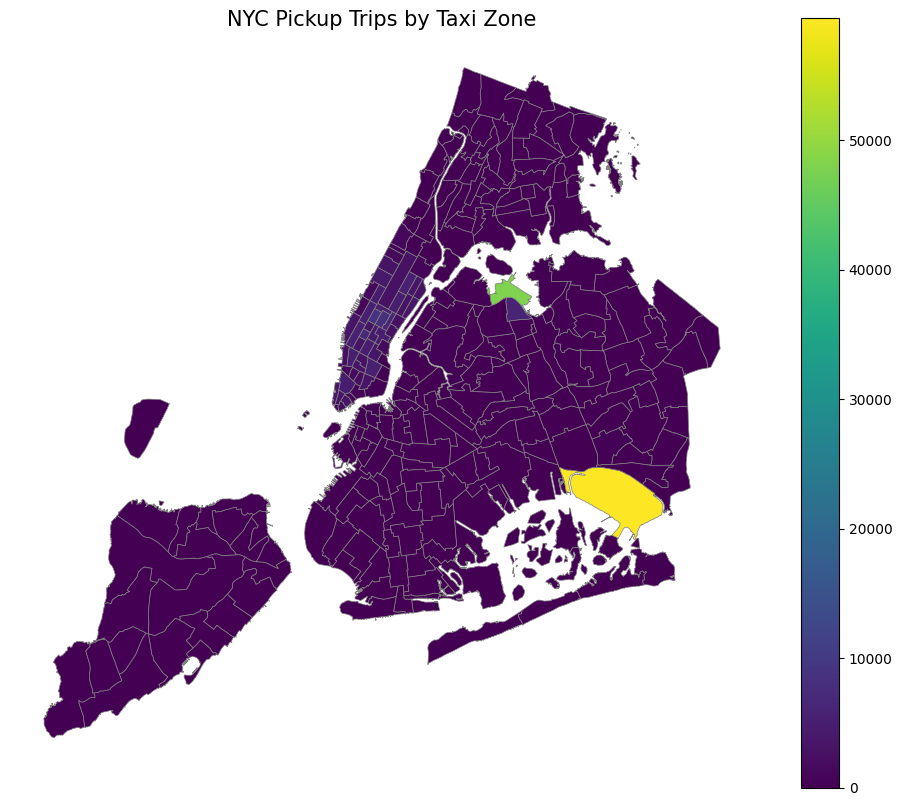

In [187]:
# Define figure and axis

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Load NYC Taxi Zone shapefile (GeoJSON version)
zones = gpd.read_file("taxi_zones.shp")  # Replace with your local file path

# Aggregate trip counts by pickup location ID
pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'trip_count']

# Merge with zone geometry
zones['LocationID'] = zones['LocationID'].astype(int)
merged = zones.merge(pickup_counts, on='LocationID', how='left')
merged['trip_count'] = merged['trip_count'].fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(12, 10))
merged.plot(column='trip_count', cmap='viridis', linewidth=0.5, edgecolor='gray', legend=True, ax=ax)
ax.set_title("NYC Pickup Trips by Taxi Zone", fontsize=15)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.axis("off")
plt.show()

In [191]:
# can you try displaying the zones DF sorted by the number of trips?

import pandas as pd
import geopandas as gpd

# Load the NYC Taxi Zones shapefile
shapefile_path = "taxi_zones.shp"  # Update with the correct path
zones_gdf = gpd.read_file(shapefile_path)

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Group the trip data by PULocationID and count the number of trips per location
location_trip_counts = df.groupby('PULocationID').size().reset_index(name='trip_count')

# Merge trip counts back to the zones GeoDataFrame
merged_gdf = zones_gdf.merge(location_trip_counts, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values with 0 (for zones with no trips)
merged_gdf['trip_count'] = merged_gdf['trip_count'].fillna(0)

# Sort the GeoDataFrame by trip count in descending order
sorted_zones = merged_gdf.sort_values(by='trip_count', ascending=False)

# Display the sorted GeoDataFrame
print(sorted_zones)


     OBJECTID  Shape_Leng  Shape_Area  \
131       132    0.245479    0.002038   
137       138    0.107467    0.000537   
229       230    0.031028    0.000056   
160       161    0.035804    0.000072   
185       186    0.024696    0.000037   
..        ...         ...         ...   
109       110    0.103946    0.000526   
175       176    0.151995    0.000658   
104       105    0.077425    0.000369   
83         84    0.233624    0.002074   
110       111    0.059931    0.000209   

                                              zone  LocationID        borough  \
131                                    JFK Airport         132         Queens   
137                              LaGuardia Airport         138         Queens   
229                      Times Sq/Theatre District         230      Manhattan   
160                                 Midtown Center         161      Manhattan   
185                   Penn Station/Madison Sq West         186      Manhattan   
..                   

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [193]:
# Find routes which have the slowest speeds at different times of the day

import pandas as pd

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Convert pickup and dropoff times to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

# Calculate trip duration in hours to avoid small values in division
df['trip_duration_hours'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600

# Extract the hour from the pickup time
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by pickup and dropoff location along with the hour of the trip
route_hourly_stats = df.groupby(['PULocationID', 'DOLocationID', 'hour']).agg(
    avg_distance=('trip_distance', 'mean'),
    avg_duration=('trip_duration_hours', 'mean')
).reset_index()

# Compute speed (distance / average trip duration per hour)
route_hourly_stats['speed'] = route_hourly_stats['avg_distance'] / route_hourly_stats['avg_duration']

# Identify the slowest routes (lowest speed) at different hours
slowest_routes = route_hourly_stats.sort_values(by=['hour', 'speed']).groupby('hour').first().reset_index()

# Display the slowest routes per hour
print(slowest_routes)


    hour  PULocationID  DOLocationID  avg_distance  avg_duration     speed
0      0           114           246      0.003350      0.371944  0.009006
1      1           114           120      1.415924     -0.200833 -7.050244
2      2            68            45      0.007750      0.404444  0.019163
3      3           246           148      0.012151      0.367500  0.033063
4      4           148           100      0.005550      0.367222  0.015113
5      5           231            61      0.278384     23.273889  0.011961
6      6           152           239      0.001149      0.311111  0.003694
7      7           236           152      0.003350      0.307500  0.010893
8      8           238           140      0.001149      0.383611  0.002996
9      9           263           230      0.001149      0.482500  0.002382
10    10           107           211      0.001149      0.347500  0.003308
11    11           161           262      0.001149      0.790000  0.001455
12    12           158   

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

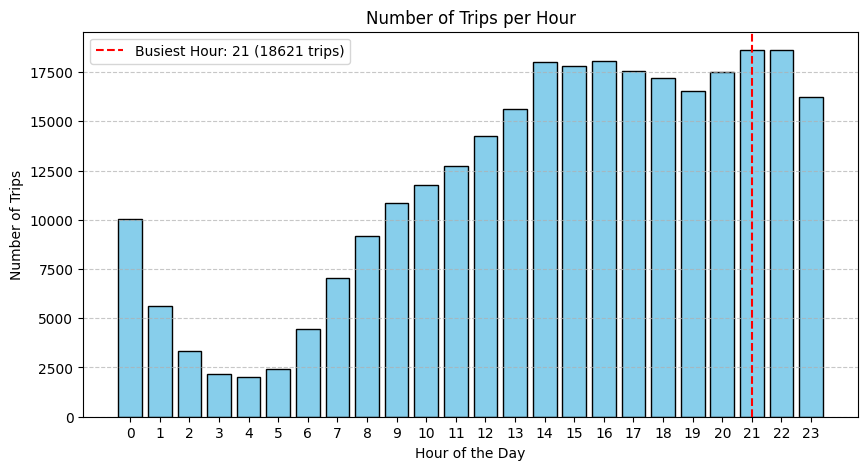

Busiest Hour: 21 with 18621 trips


In [195]:
# Visualise the number of trips per hour and find the busiest hour

import pandas as pd
import matplotlib.pyplot as plt

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Convert pickup datetime to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract hour from pickup time
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Count the number of trips per hour
hourly_trip_counts = df.groupby('hour').size().reset_index(name='trip_count')

# Find the busiest hour (hour with the maximum trips)
busiest_hour = hourly_trip_counts.loc[hourly_trip_counts['trip_count'].idxmax()]

# Plot the number of trips per hour
plt.figure(figsize=(10, 5))
plt.bar(hourly_trip_counts['hour'], hourly_trip_counts['trip_count'], color='skyblue', edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Hour')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the busiest hour
plt.axvline(x=busiest_hour['hour'], color='red', linestyle='--', label=f'Busiest Hour: {int(busiest_hour["hour"])} ({busiest_hour["trip_count"]} trips)')
plt.legend()

# Show the plot
plt.show()

# Display the busiest hour and the number of trips
print(f"Busiest Hour: {int(busiest_hour['hour'])} with {busiest_hour['trip_count']} trips")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [197]:
# Scale up the number of trips

import pandas as pd

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Convert pickup datetime to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract hour from pickup time
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Count the number of trips per hour
hourly_trip_counts = df.groupby('hour').size().reset_index(name='trip_count')

# Find the top 5 busiest hours based on trip count
top_5_busiest_hours = hourly_trip_counts.nlargest(5, 'trip_count')

# Display the top 5 busiest hours
print("Top 5 Busiest Hours:")
print(top_5_busiest_hours)


# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1  

# Scale up the number of trips to estimate for the full dataset
top_5_busiest_hours['scaled_trip_count'] = top_5_busiest_hours['trip_count'] / sample_fraction

Top 5 Busiest Hours:
    hour  trip_count
21    21       18621
22    22       18621
16    16       18041
14    14       18012
15    15       17813


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

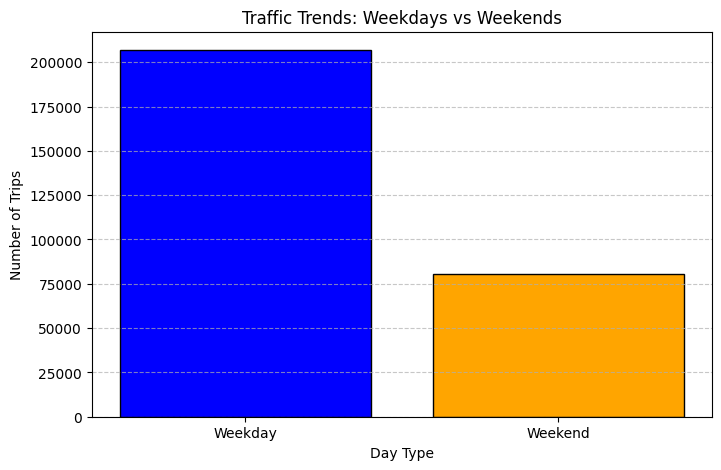

Traffic Trends: Weekdays vs Weekends
  day_type  trip_count
0  Weekday      206869
1  Weekend       80746


In [199]:
# Compare traffic trends for the week days and weekends

import pandas as pd
import matplotlib.pyplot as plt

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Convert pickup datetime to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract the day of the week (0 = Monday, ..., 6 = Sunday)
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Categorize days into weekday (0-4) and weekend (5-6)
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Group by weekday/weekend and count the number of trips
traffic_trends = df.groupby('day_type').size().reset_index(name='trip_count')

# Plot traffic trends for weekdays vs weekends
plt.figure(figsize=(8, 5))
plt.bar(traffic_trends['day_type'], traffic_trends['trip_count'], color=['blue', 'orange'], edgecolor='black')
plt.xlabel('Day Type')
plt.ylabel('Number of Trips')
plt.title('Traffic Trends: Weekdays vs Weekends')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the traffic trends data
print("Traffic Trends: Weekdays vs Weekends")
print(traffic_trends)


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top 10 Pickup Zones:
   PULocationID  pickup_count
0           132         59470
1           138         48037
2           230          8571
3           161          8107
4           186          6806
5           162          6164
6            70          5920
7            68          5555
8           236          5481
9            79          5368

Top 10 Dropoff Zones:
   DOLocationID  dropoff_count
0           138          17245
1           132          12535
2           230           8104
3           236           6738
4           231           6429
5           239           5898
6           161           5597
7           238           5432
8            13           5261
9            87           5128


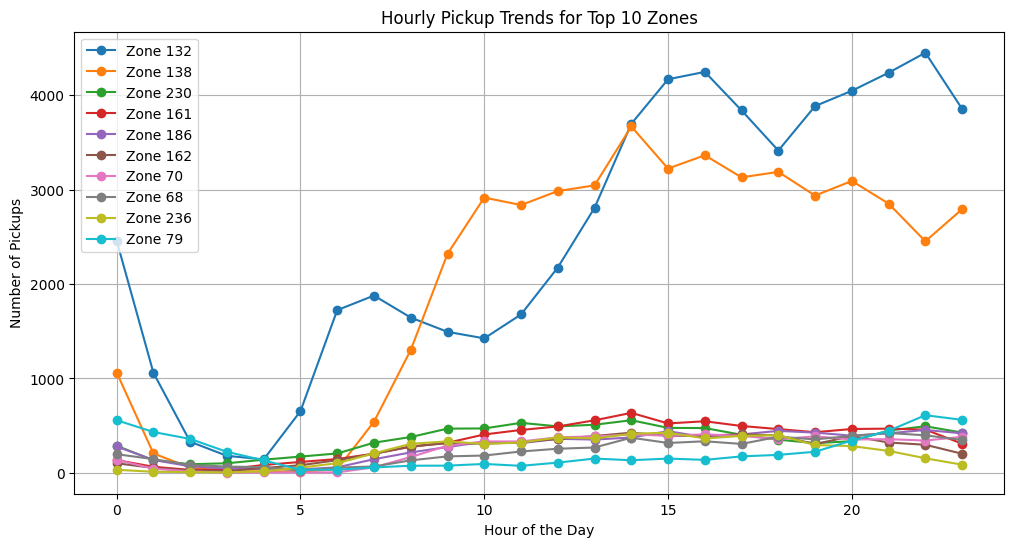

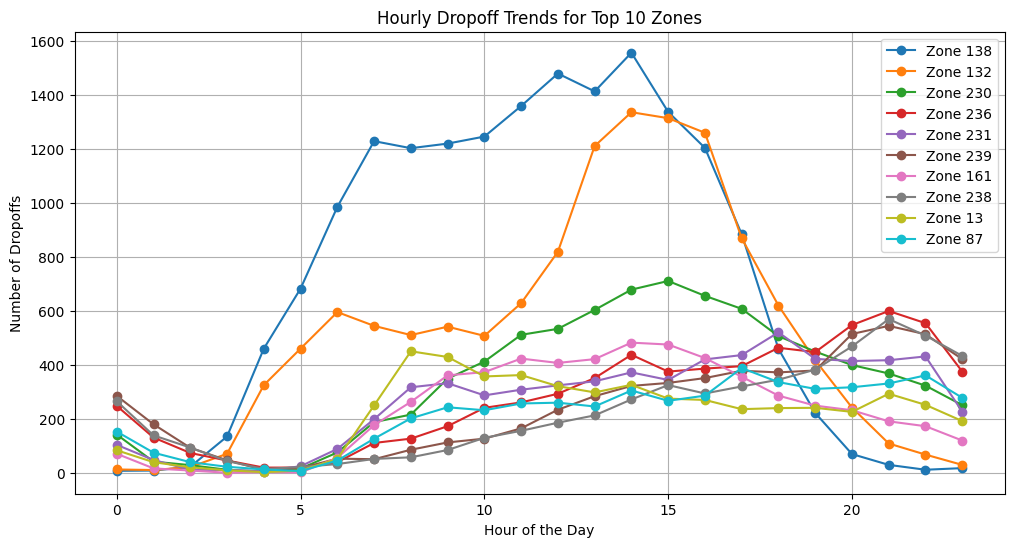

In [201]:
# Find top 10 pickup and dropoff zones

import pandas as pd
import matplotlib.pyplot as plt

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Convert pickup datetime to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract hour from pickup time
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Identify the top 10 zones with the highest number of hourly pickups
top_10_pickup_zones = df.groupby('PULocationID').size().nlargest(10).reset_index(name='pickup_count')

# Identify the top 10 zones with the highest number of hourly dropoffs
top_10_dropoff_zones = df.groupby('DOLocationID').size().nlargest(10).reset_index(name='dropoff_count')

# Extract trips from the top 10 pickup and dropoff zones
top_pickup_trends = df[df['PULocationID'].isin(top_10_pickup_zones['PULocationID'])] \
                        .groupby(['hour', 'PULocationID']).size().reset_index(name='pickup_trend')

top_dropoff_trends = df[df['DOLocationID'].isin(top_10_dropoff_zones['DOLocationID'])] \
                        .groupby(['hour', 'DOLocationID']).size().reset_index(name='dropoff_trend')

# Display the top 10 pickup and dropoff zones
print("Top 10 Pickup Zones:")
print(top_10_pickup_zones)

print("\nTop 10 Dropoff Zones:")
print(top_10_dropoff_zones)

# Plot pickup trends for top 10 zones
plt.figure(figsize=(12, 6))
for zone in top_10_pickup_zones['PULocationID']:
    subset = top_pickup_trends[top_pickup_trends['PULocationID'] == zone]
    plt.plot(subset['hour'], subset['pickup_trend'], marker='o', linestyle='-', label=f'Zone {zone}')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.legend()
plt.grid(True)
plt.show()

# Plot dropoff trends for top 10 zones
plt.figure(figsize=(12, 6))
for zone in top_10_dropoff_zones['DOLocationID']:
    subset = top_dropoff_trends[top_dropoff_trends['DOLocationID'] == zone]
    plt.plot(subset['hour'], subset['dropoff_trend'], marker='o', linestyle='-', label=f'Zone {zone}')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Dropoffs')
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.legend()
plt.grid(True)
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [203]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
import pandas as pd

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet') 

# Calculate pickup and dropoff counts per location
pickup_counts = df['PULocationID'].value_counts()
dropoff_counts = df['DOLocationID'].value_counts()

# Compute the pickup/dropoff ratio
location_ratios = (pickup_counts / dropoff_counts).dropna()

# Get top 10 and bottom 10 locations based on pickup/dropoff ratio
top_10_ratios = location_ratios.nlargest(10)
bottom_10_ratios = location_ratios.nsmallest(10)

# Create a DataFrame for results
top_bottom_ratios = pd.DataFrame({
    "LocationID": top_10_ratios.index.tolist() + bottom_10_ratios.index.tolist(),
    "Pickup/Dropoff Ratio": top_10_ratios.tolist() + bottom_10_ratios.tolist(),
    "Category": ["Top 10"] * 10 + ["Bottom 10"] * 10
})

# Print the results in the console
print(top_bottom_ratios)

    LocationID  Pickup/Dropoff Ratio   Category
0           70             22.255639     Top 10
1          132              4.744316     Top 10
2          138              2.785561     Top 10
3          186              2.551931     Top 10
4          249              2.046699     Top 10
5          207              2.000000     Top 10
6          114              1.693423     Top 10
7           10              1.635359     Top 10
8          215              1.546667     Top 10
9           43              1.545561     Top 10
10         257              0.001639  Bottom 10
11           1              0.002905  Bottom 10
12          61              0.004110  Bottom 10
13          17              0.004513  Bottom 10
14         198              0.005093  Bottom 10
15         225              0.005269  Bottom 10
16         177              0.005780  Bottom 10
17         188              0.006676  Bottom 10
18          16              0.006897  Bottom 10
19          26              0.007299  Bo

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [205]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones

import pandas as pd

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet')

# Convert pickup datetime column to datetime type for filtering
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract hour from the pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Define night hours (11 PM to 5 AM)
night_hours = list(range(23, 24)) + list(range(0, 6))

# Filter data for night hours
night_df = df[df['pickup_hour'].isin(night_hours)]

# Count pickups and dropoffs during night hours
night_pickup_counts = night_df['PULocationID'].value_counts()
night_dropoff_counts = night_df['DOLocationID'].value_counts()

# Get top 10 pickup and dropoff zones
top_10_night_pickups = night_pickup_counts.nlargest(10)
top_10_night_dropoffs = night_dropoff_counts.nlargest(10)

# Create a DataFrame for results
night_zones = pd.DataFrame({
    "LocationID": top_10_night_pickups.index.tolist() + top_10_night_dropoffs.index.tolist(),
    "Count": top_10_night_pickups.tolist() + top_10_night_dropoffs.tolist(),
    "Category": ["Top 10 Night Pickups"] * 10 + ["Top 10 Night Dropoffs"] * 10
})

# Print the results
print(night_zones)


# Note that the top zones should be of night hours and not the overall top zones



    LocationID  Count               Category
0          132   8675   Top 10 Night Pickups
1          138   4160   Top 10 Night Pickups
2           79   2295   Top 10 Night Pickups
3          249   2042   Top 10 Night Pickups
4           48   1634   Top 10 Night Pickups
5          148   1606   Top 10 Night Pickups
6          230   1349   Top 10 Night Pickups
7          114   1304   Top 10 Night Pickups
8          186   1026   Top 10 Night Pickups
9           68    921   Top 10 Night Pickups
10         138   1342  Top 10 Night Dropoffs
11         263   1150  Top 10 Night Dropoffs
12         239   1062  Top 10 Night Dropoffs
13         238   1019  Top 10 Night Dropoffs
14         132    939  Top 10 Night Dropoffs
15         236    921  Top 10 Night Dropoffs
16         181    858  Top 10 Night Dropoffs
17           7    773  Top 10 Night Dropoffs
18         265    765  Top 10 Night Dropoffs
19         262    741  Top 10 Night Dropoffs


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [207]:
# Filter for night hours (11 PM to 5 AM)

import pandas as pd

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet')

# Convert pickup datetime column to datetime type
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract hour from the pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Define night hours (11 PM to 5 AM)
night_hours = list(range(23, 24)) + list(range(0, 6))

# Filter for night and day trips
night_df = df[df['pickup_hour'].isin(night_hours)]
day_df = df[~df['pickup_hour'].isin(night_hours)]

# Calculate total revenue for night and day hours
night_revenue = night_df['total_amount'].sum()
day_revenue = day_df['total_amount'].sum()

# Compute revenue share percentages
total_revenue = night_revenue + day_revenue
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

# Create a DataFrame for visualization
revenue_share_df = pd.DataFrame({
    "Time Period": ["Nighttime (11 PM - 5 AM)", "Daytime (5 AM - 11 PM)"],
    "Revenue Share (%)": [night_revenue_share, day_revenue_share]
})

# Print the revenue share
print(revenue_share_df)


                Time Period  Revenue Share (%)
0  Nighttime (11 PM - 5 AM)          12.030985
1    Daytime (5 AM - 11 PM)          87.969015


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [214]:
# Analyse the fare per mile per passenger for different passenger counts

import pandas as pd

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet')

# Filter out trips with zero or negative distance to avoid division errors
df_filtered = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)].copy()

# Compute fare per mile per passenger
df_filtered.loc[:, 'fare_per_mile_per_passenger'] = df_filtered['fare_amount'] / (df_filtered['trip_distance'] * df_filtered['passenger_count'])

# Group by passenger count and compute average fare per mile per passenger
fare_analysis = df_filtered.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Rename columns for clarity
fare_analysis.columns = ['Passenger Count', 'Average Fare per Mile per Passenger']

# Print the results
print(fare_analysis)

   Passenger Count  Average Fare per Mile per Passenger
0              1.0                             0.341862
1              2.0                             0.158227
2              3.0                             0.117600
3              4.0                             0.087198
4              5.0                             0.066993
5              6.0                             0.083832


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [216]:
# Compare the average fare per mile for different days and for different times of the day

import pandas as pd

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet')

# Convert pickup datetime column to datetime type
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract day of the week and hour of the day
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
df['hour_of_day'] = df['tpep_pickup_datetime'].dt.hour

# Filter out trips with zero or negative distance to avoid division errors
df_filtered = df[df['trip_distance'] > 0].copy()

# Compute fare per mile
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']

# Compute average fare per mile for different days of the week
fare_per_mile_day = df_filtered.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# Compute average fare per mile for different hours of the day
fare_per_mile_hour = df_filtered.groupby('hour_of_day')['fare_per_mile'].mean().reset_index()

# Print the results
print("Average Fare per Mile by Day:")
print(fare_per_mile_day)

print("\nAverage Fare per Mile by Hour:")
print(fare_per_mile_hour)

Average Fare per Mile by Day:
  day_of_week  fare_per_mile
0      Friday       0.337204
1      Monday       0.273497
2    Saturday       0.361217
3      Sunday       0.245971
4    Thursday       0.377603
5     Tuesday       0.363227
6   Wednesday       0.407552

Average Fare per Mile by Hour:
    hour_of_day  fare_per_mile
0             0       0.203527
1             1       0.174132
2             2       0.161669
3             3       0.196932
4             4       0.145620
5             5       0.147663
6             6       0.152896
7             7       0.222276
8             8       0.293238
9             9       0.325216
10           10       0.365274
11           11       0.437149
12           12       0.436187
13           13       0.435960
14           14       0.390119
15           15       0.472936
16           16       0.427570
17           17       0.461952
18           18       0.436369
19           19       0.288817
20           20       0.279875
21           21       0.

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [220]:
# Compare fare per mile for different vendors

import pandas as pd

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet')

# Convert pickup datetime column to datetime type
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Filter out trips with zero or negative distance to avoid division errors
df_filtered = df[df['trip_distance'] > 0].copy()

# Compute fare per mile
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']

# Compute average fare per mile for different vendors
fare_per_mile_vendor = df_filtered.groupby('VendorID')['fare_per_mile'].mean().reset_index()

# Rename columns for clarity
fare_per_mile_vendor.columns = ['Vendor ID', 'Average Fare per Mile']

# Print the results
print("Average Fare per Mile by Vendor:")
print(fare_per_mile_vendor)

Average Fare per Mile by Vendor:
   Vendor ID  Average Fare per Mile
0          1               0.265241
1          2               0.360459


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [222]:
# Defining distance tiers

import pandas as pd

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet')

# Convert pickup datetime column to datetime type
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Filter out trips with zero or negative distance to avoid division errors
df_filtered = df[df['trip_distance'] > 0].copy()

# Define distance tiers (in miles)
bins = [0, 1, 3, 5, 10, 20, 50, 100, float('inf')]  
labels = ["0-1", "1-3", "3-5", "5-10", "10-20", "20-50", "50-100", "100+"]

# Assign distance tiers
df_filtered['distance_tier'] = pd.cut(df_filtered['trip_distance'], bins=bins, labels=labels, right=False)

# Compute fare per mile
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']

# Compute average fare per mile for each distance tier (Fixing the warning)
fare_per_mile_tier = df_filtered.groupby('distance_tier', observed=True)['fare_per_mile'].mean().reset_index()

# Rename columns for clarity
fare_per_mile_tier.columns = ['Distance Tier', 'Average Fare per Mile']

# Print the results
print("Average Fare per Mile by Distance Tier:")
print(fare_per_mile_tier)

Average Fare per Mile by Distance Tier:
  Distance Tier  Average Fare per Mile
0           0-1               0.553204
1           1-3               0.161830
2           3-5               0.145800
3          5-10               0.151821
4         10-20               0.192953
5         20-50               0.172586


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [224]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

import pandas as pd

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet')

# Convert pickup datetime column to datetime type
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Filter out invalid data (zero/negative trip distance, negative tip amount, etc.)
df_filtered = df[(df['total_amount'] > 0) & (df['tip_amount'] >= 0) & (df['trip_distance'] > 0)].copy()

# Define distance tiers
bins = [0, 1, 3, 5, 10, 20, 50, 100, float('inf')]  
labels = ["0-1", "1-3", "3-5", "5-10", "10-20", "20-50", "50-100", "100+"]

# Assign distance tiers
df_filtered['distance_tier'] = pd.cut(df_filtered['trip_distance'], bins=bins, labels=labels, right=False)

# Compute tip percentage
df_filtered['tip_percentage'] = (df_filtered['tip_amount'] / df_filtered['total_amount']) * 100

# Analyze tip percentages based on distance tiers
tip_by_distance = df_filtered.groupby('distance_tier', observed=True)['tip_percentage'].mean().reset_index()

# Analyze tip percentages based on passenger counts
tip_by_passenger_count = df_filtered.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Analyze tip percentages based on pickup times (hour of the day)
df_filtered['pickup_hour'] = df_filtered['tpep_pickup_datetime'].dt.hour
tip_by_hour = df_filtered.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

# Print results
print("Tip Percentage by Distance Tier:")
print(tip_by_distance)

print("\nTip Percentage by Passenger Count:")
print(tip_by_passenger_count)

print("\nTip Percentage by Pickup Hour:")
print(tip_by_hour)

Tip Percentage by Distance Tier:
  distance_tier  tip_percentage
0           0-1     1023.220914
1           1-3      480.925512
2           3-5      432.714010
3          5-10      398.395898
4         10-20      307.764209
5         20-50      163.500176

Tip Percentage by Passenger Count:
   passenger_count  tip_percentage
0              0.0      780.109667
1              1.0      730.519766
2              2.0      680.856671
3              3.0      695.584957
4              4.0      710.457918
5              5.0      754.744416
6              6.0      748.205391

Tip Percentage by Pickup Hour:
    pickup_hour  tip_percentage
0             0      750.837016
1             1      839.178541
2             2      907.449307
3             3      876.996913
4             4      707.780468
5             5      561.742304
6             6      722.370328
7             7      839.771726
8             8      807.091156
9             9      803.244018
10           10      770.777770
11         

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [226]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

import pandas as pd

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet')

# Convert pickup datetime column to datetime type
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Filter out invalid data (zero/negative trip distance, negative tip amount, etc.)
df_filtered = df[(df['total_amount'] > 0) & (df['tip_amount'] >= 0) & (df['trip_distance'] > 0)].copy()

# Compute tip percentage
df_filtered['tip_percentage'] = (df_filtered['tip_amount'] / df_filtered['total_amount']) * 100

# Define categories for tip percentage comparison
low_tip_trips = df_filtered[df_filtered['tip_percentage'] < 10]
high_tip_trips = df_filtered[df_filtered['tip_percentage'] > 25]

# Compare average fare, distance, and tip amount for low and high tip trips
comparison_metrics = {
    "Metric": ["Average Fare", "Average Trip Distance", "Average Tip Amount"],
    "Low Tip (<10%)": [
        low_tip_trips['fare_amount'].mean(),
        low_tip_trips['trip_distance'].mean(),
        low_tip_trips['tip_amount'].mean(),
    ],
    "High Tip (>25%)": [
        high_tip_trips['fare_amount'].mean(),
        high_tip_trips['trip_distance'].mean(),
        high_tip_trips['tip_amount'].mean(),
    ]
}

# Convert to DataFrame
tip_comparison_df = pd.DataFrame(comparison_metrics)

# Print the results
print("Comparison of Low and High Tip Trips:")
print(tip_comparison_df)


Comparison of Low and High Tip Trips:
                  Metric  Low Tip (<10%)  High Tip (>25%)
0           Average Fare        0.215312         0.231166
1  Average Trip Distance        1.237496         1.437755
2     Average Tip Amount        0.014195         1.625027


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [228]:
# See how passenger count varies across hours and days

import pandas as pd

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet')

# Convert pickup datetime column to datetime type
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Compute average passenger count by hour of the day
passenger_count_by_hour = df.groupby(df['tpep_pickup_datetime'].dt.hour)['passenger_count'].mean().reset_index()
passenger_count_by_hour.columns = ['Hour of Day', 'Average Passenger Count']

# Compute average passenger count by day of the week
passenger_count_by_day = df.groupby(df['tpep_pickup_datetime'].dt.day_name())['passenger_count'].mean().reset_index()
passenger_count_by_day.columns = ['Day of Week', 'Average Passenger Count']

# Print results
print("Passenger Count by Hour of Day:")
print(passenger_count_by_hour)

print("\nPassenger Count by Day of Week:")
print(passenger_count_by_day)

Passenger Count by Hour of Day:
    Hour of Day  Average Passenger Count
0             0                 1.381737
1             1                 1.400106
2             2                 1.415686
3             3                 1.466913
4             4                 1.433801
5             5                 1.388797
6             6                 1.380269
7             7                 1.374733
8             8                 1.363251
9             9                 1.372750
10           10                 1.410946
11           11                 1.424119
12           12                 1.442285
13           13                 1.427869
14           14                 1.434544
15           15                 1.451356
16           16                 1.439610
17           17                 1.413198
18           18                 1.375058
19           19                 1.384136
20           20                 1.374306
21           21                 1.380646
22           22          

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [230]:
# How does passenger count vary across zones

import pandas as pd

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet')

# Compute average passenger count by pickup location (zone)
passenger_count_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Rename columns for clarity
passenger_count_by_zone.columns = ['Pickup Location ID', 'Average Passenger Count']

# Print results
print("Passenger Count by Pickup Zone:")
print(passenger_count_by_zone)

Passenger Count by Pickup Zone:
     Pickup Location ID  Average Passenger Count
0                     1                 1.545455
1                     2                 1.000000
2                     4                 1.350427
3                     6                 3.000000
4                     7                 1.459016
..                  ...                      ...
196                 261                 1.570288
197                 262                 1.310210
198                 263                 1.340562
199                 264                 1.337772
200                 265                 1.444444

[201 rows x 2 columns]


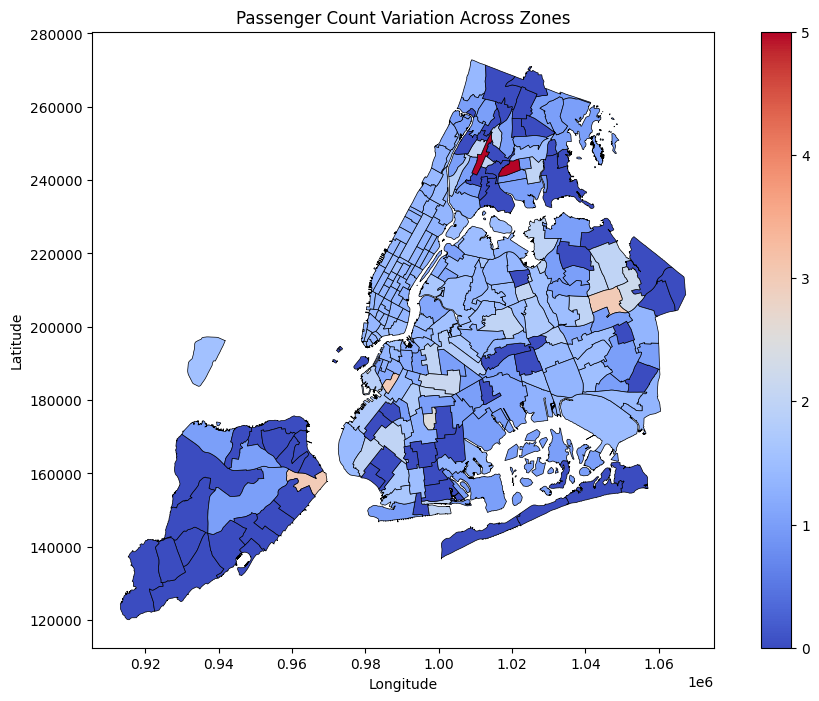

In [232]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame

import pandas as pd
import geopandas as gpd

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet')

# Load the NYC Taxi Zones GeoDataFrame (change path accordingly)
zones_gdf = gpd.read_file("taxi_zones.shp")  # Ensure this file is available

# Compute average passenger count by pickup location (zone)
passenger_count_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
passenger_count_by_zone.columns = ['LocationID', 'Average Passenger Count']

# Merge the zones GeoDataFrame with passenger count data
zones_with_passenger_data = zones_gdf.merge(passenger_count_by_zone, left_on='LocationID', right_on='LocationID', how='left')

# Fill missing values with zero (if some zones have no data)
zones_with_passenger_data['Average Passenger Count'] = zones_with_passenger_data['Average Passenger Count'].fillna(0)

# Plot the passenger count variation across zones
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
zones_with_passenger_data.plot(column='Average Passenger Count', cmap='coolwarm', legend=True, edgecolor="black", linewidth=0.5, ax=ax)

plt.title("Passenger Count Variation Across Zones")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [236]:
# How often is each surcharge applied?

import pandas as pd

# Load the PARQUET file
df = pd.read_parquet('sampled_data_reduced.parquet')

# List of surcharge-related columns in the dataset
surcharge_columns = ['extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

# Count occurrences of each surcharge being applied (values > 0)
surcharge_counts = {col: (df[col] > 0).sum() for col in surcharge_columns}

# Convert to DataFrame for better visualization
surcharge_df = pd.DataFrame(list(surcharge_counts.items()), columns=['Surcharge Type', 'Occurrences'])

# Calculate percentage of trips where each surcharge is applied
total_trips = len(df)
surcharge_df['Applied in (%)'] = (surcharge_df['Occurrences'] / total_trips) * 100

# Print results
print("Surcharge Application Frequency:")
print(surcharge_df)

Surcharge Application Frequency:
          Surcharge Type  Occurrences  Applied in (%)
0                  extra       197118       68.535368
1                mta_tax       281398       97.838430
2           tolls_amount       109369       38.026181
3  improvement_surcharge       287614       99.999652
4   congestion_surcharge       240681       83.681658
5            airport_fee       108442       37.703875


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [9]:
RECOMMENDATIONS TO OPTIMIZE ROUTING AND DISPATCHING
====================================================

1. INTELLIGENT DRIVER POSITIONING
----------------------------------
Goal: Minimize idle time and improve pickup efficiency.

- Guide idle drivers to high-likelihood pickup areas
- Use micro-zoning to avoid over-clustering cabs in small zones
- Rotate cabs between high- and mid-tier zones to prevent congestion
- Use wait time and drop-off location analysis to rebalance cabs dynamically

2. REAL-TIME RE-ROUTING & DISPATCH
-----------------------------------
Goal: Improve ride-matching efficiency in real-time.

- Implement dynamic dispatching to:
  - Assign closest available driver
  - Consider traffic, ETA, and historical pickup time
- Integrate real-time traffic APIs (e.g., Google Maps, HERE)
- Use predictive ETA for smarter ride assignments

3. ROUTE OPTIMIZATION FOR MULTIPLE STOPS
-----------------------------------------
Goal: Reduce fuel cost and time in shared or pool rides.

- Use route optimization algorithms for:
  - Pool/shared rides
  - Parcel delivery add-ons (if applicable)
- Apply time-window and geospatial clustering models

4. DRIVER SHIFT OPTIMIZATION
-----------------------------
Goal: Align driver supply with peak demand periods.

- Use historical data to identify:
  - Underserved hours
  - Peak-hour mismatches
- Recommend shift patterns:
  - Part-time drivers on weekends
  - Early morning or late-night shift boosting
- Balance driver fatigue with shift length analytics

5. PICKUP TIME REDUCTION
-------------------------
Goal: Reduce customer wait time and increase satisfaction.

- Optimize cab standby positions near:
  - High-volume hotels, stations, malls
  - Ride completion hotspots
- Apply buffer zones for standby drivers (within 1–2 blocks of high-demand areas)

6. DRIVER-TO-ZONE MATCHING
---------------------------
Goal: Leverage driver familiarity to increase efficiency.

- Assign experienced drivers to complex or high-traffic zones
- Use machine learning to model driver efficiency by zone and time
- Reward drivers with higher success metrics (lower cancellations, faster ETAs)

7. HANDLING OPERATIONAL BOTTLENECKS
------------------------------------
Goal: Identify and address dispatching inefficiencies.

- Monitor:
  - Trip cancellation patterns
  - Idle vs engaged driver ratio
  - Pickup delay spikes by location
- Re-train or re-route underperforming zones or clusters
- Improve dispatcher algorithms to avoid overloading specific areas

8. INTEGRATE DEMAND PREDICTION MODELS
--------------------------------------
Goal: Stay ahead of demand fluctuations and act preemptively.

- Use machine learning to forecast:
  - Zone-wise demand per hour/day
  - Surge likelihood
- Preposition cabs accordingly with visual alerts on driver apps

SUMMARY CHECKLIST
------------------
[✔] Create time and zone-based demand heatmaps  
[✔] Implement real-time dispatching and re-routing logic  
[✔] Use ETA, traffic, and idle time for better trip assignments  
[✔] Optimize shared ride routes for time/fuel savings  
[✔] Align driver shifts with peak demand periods  
[✔] Reduce pickup time through standby zones  
[✔] Match drivers to zones based on familiarity and performance  
[✔] Continuously monitor cancellation, wait time, and idle rates  
[✔] Apply predictive models to anticipate and prepare for demand spikes

SyntaxError: invalid character '→' (U+2192) (775164595.py, line 5)

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
STRATEGIC CAB POSITIONING BASED ON TRIP TRENDS
==============================================

1. TIME-OF-DAY STRATEGY
------------------------
6 AM – 10 AM: 
  - Focus: Residential → Business Zones
  - Reason: Morning commuters

11 AM – 3 PM:
  - Focus: Tourist Attractions, Shopping Areas
  - Reason: Midday leisure travel

4 PM – 8 PM:
  - Focus: Business → Residential Zones
  - Reason: Evening return commutes

9 PM – 2 AM:
  - Focus: Nightlife Districts (e.g., LES, SoHo)
  - Reason: Entertainment and bar-hopping crowds

2. DAY-OF-WEEK STRATEGY
------------------------
Mon–Fri:
  - Focus: Business centers during the day, Residential zones at night
  - Reason: Standard work commute behavior

Friday PM:
  - Focus: Entertainment/nightlife zones
  - Reason: Start of weekend activity surge

Saturday–Sunday:
  - Focus: Parks, Malls, Airports, Nightlife Zones
  - Reason: Leisure, shopping, tourism trips

3. MONTHLY & SEASONAL STRATEGY
-------------------------------
Summer (June–August):
  - Focus: Hotels, Landmarks, Tourist Hotspots
  - Reason: Higher tourist activity

Winter Holidays (Nov–Dec):
  - Focus: Shopping districts (e.g., 5th Avenue)
  - Reason: Holiday shopping traffic

Rainy or Snowy Days:
  - Focus: Subway Exits, Transit Hubs
  - Reason: Demand for last-mile transport

Event Months (Marathon, Fashion Week, etc.):
  - Focus: Event Venues, Hotels
  - Reason: Localized surges in traffic

4. ZONE-LEVEL DEPLOYMENT STRATEGY
----------------------------------
- Place cabs in areas with consistent demand.
- Assign long-trip focused cabs to airports and stations.
- Keep short-trip cabs in commercial/tourist areas.

5. CAB POOLING OPTIMIZATION
----------------------------
- Promote shared rides in zones with frequent short trips.
- Reassign idle cabs from overserved areas to high-potential underserved zones.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
DATA-DRIVEN PRICING STRATEGY FOR MAXIMIZING REVENUE
====================================================

1. DYNAMIC PRICING BASED ON DEMAND
-----------------------------------
Goal: Maximize earnings during high-demand periods and incentivize rides during lulls.

- Identify peak demand hours (e.g., 7–10 AM, 5–8 PM, 9 PM–2 AM weekends).
- Apply time-based fare multipliers (e.g., 1.2x, 1.5x) during peak times.
- Use event calendars and weather conditions to trigger temporary surges.

2. ZONE-BASED PRICING TIERS
----------------------------
Goal: Optimize revenue based on location-specific demand.

- Set fixed surcharges for airport trips (e.g., $5 for JFK/LGA).
- Differentiate pricing in tourist-heavy vs residential zones.
- Encourage long-distance rides to outer boroughs with incentive-based pricing.

3. PASSENGER COUNT-BASED OPTIMIZATION
--------------------------------------
Goal: Monetize group rides effectively.

- Analyze fare-per-mile per passenger.
- Apply small surcharges for 3+ passengers.
- Offer solo rider discounts during off-peak hours to boost volume.

4. WEATHER-TRIGGERED ADJUSTMENTS
---------------------------------
Goal: Take advantage of increased demand during poor weather.

- Use real-time weather data to activate temporary fare increases.
- Target conditions like rain, snow, extreme heat, or cold.
- Combine with scarcity-based logic (e.g., low cab availability).

5. MINIMUM FARE OPTIMIZATION
-----------------------------
Goal: Ensure profitability for short trips.

- Set a minimum fare threshold based on operational costs.
- Offer ride bundles (e.g., two short rides for a discounted package).

6. OFF-PEAK DISCOUNTS
----------------------
Goal: Stimulate demand during low-traffic periods.

- Offer 10–15% discounts during:
  - Weekday afternoons (1–4 PM)
  - Late-night weekday hours
- Promote discounts through app banners or SMS.

7. SUBSCRIPTION & LOYALTY PROGRAMS
-----------------------------------
Goal: Retain high-frequency and high-value customers.

- Identify top 10% riders by frequency or value.
- Offer:
  - Ride credits
  - Monthly ride plans (e.g., 10 rides at a flat rate)
  - Referral bonuses

8. COMPETITOR PRICE BENCHMARKING
---------------------------------
Goal: Stay competitively priced without undercutting profits.

- Regularly compare fare rates with Uber, Lyft, and others.
- Benchmark:
  - Base fare
  - Per-mile and per-minute rates
  - Surge multipliers
- Adjust your pricing to stay within 10% range of market leaders.

SUMMARY TABLE
--------------
Strategy                      | Purpose                          | Data Input
------------------------------|-----------------------------------|-------------------------------
Dynamic Pricing               | Maximize revenue at peaks         | Hourly demand & events
Zone-Based Pricing            | Monetize high-traffic zones       | Trip origin/destination
Passenger-Based Optimization  | Capture value from group trips    | Passenger count analytics
Weather-Based Adjustments     | React to real-time conditions     | Weather + trip data
Minimum Fare Optimization     | Maintain short-trip profitability | Fare length analysis
Off-Peak Discounts            | Increase usage in quiet hours     | Time-of-day demand trends
Loyalty/Subscription Plans    | Retain top customers              | User frequency & spend
Competitor Benchmarking       | Maintain price competitiveness    | External pricing data
A/B Testing                   | Test & validate pricing models    | User behavior & revenue lift
